In [1]:
import pandas as pd

In [3]:
dataset = pd.read_excel('/content/drive/MyDrive/Skripsi_Ega/dataset_bersih.xlsx')

In [4]:
dataset.head()

,Review,Mhs0,Mhs0.1,Ahli,CaseFolding,Cleansing,normal_term,tokens,stop,Stemmigs
0,"Saya dulu pernah ke sini, berapa tahun yang la...",0,0.0,0,"saya dulu pernah ke sini, berapa tahun yang la...",saya dulu pernah ke sini berapa tahun yang lal...,saya dulu pernah ke sini berapa tahun yang lal...,"['saya', 'dulu', 'pernah', 'ke', 'sini', 'bera...","['tahun', 'waktu', 'fasilitas', 'kotor', 'rusa...","['tahun', 'waktu', 'fasilitas', 'kotor', 'rusa..."
1,"saya ngga masuk ke dalam, cuma untuk foto aja ...",1,1.0,1,"saya ngga masuk ke dalam, cuma untuk foto aja ...",saya ngga masuk ke dalam cuma untuk foto aja d...,saya tidak masuk ke dalam cuman untuk foto sa...,"['saya', 'ngga', 'masuk', 'ke', 'dalam', 'cuma...","['ngga', 'masuk', 'foto', 'aja', 'monumen', 's...","['ngga', 'masuk', 'foto', 'aja', 'monumen', 's..."
2,Kbs dulu kubuh banget sekarang uda beda ya ges...,0,0.0,1,kbs dulu kubuh banget sekarang uda beda ya ges...,kbs dulu kubuh banget sekarang uda beda ya ges...,kbs dulu kubuh banget sekarang sudah beda iya ...,"['kbs', 'dulu', 'kubuh', 'banget', 'sekarang',...","['kbs', 'kubuh', 'banget', 'uda', 'beda', 'ges...","['kbs', 'kubuh', 'banget', 'uda', 'beda', 'ges..."
3,Beberapa hari yang lalu gue berkunjung ke Kebu...,1,1.0,1,beberapa hari yang lalu gue berkunjung ke kebu...,beberapa hari yang lalu gue berkunjung ke kebu...,beberapa hari yang lalu saya berkunjung ke keb...,"['beberapa', 'hari', 'yang', 'lalu', 'gue', 'b...","['hari', 'gue', 'berkunjung', 'kebun', 'binata...","['hari', 'gue', 'kunjung', 'kebun', 'binatang'..."
4,"dengan HTM 05.111 weekend, sangat terjangkau d...",0,0.0,1,"dengan htm 05.111 weekend, sangat terjangkau d...",dengan htm weekend sangat terjangkau dengan ko...,dengan htm weekend sangat terjangkau dengan ko...,"['dengan', 'htm', 'weekend', 'sangat', 'terjan...","['htm', 'weekend', 'terjangkau', 'kondisi', 'k...","['htm', 'weekend', 'jangkau', 'kondisi', 'kbs'..."


In [6]:
dataset['len_words'] = dataset.Stemmigs.apply(lambda x: len(x))

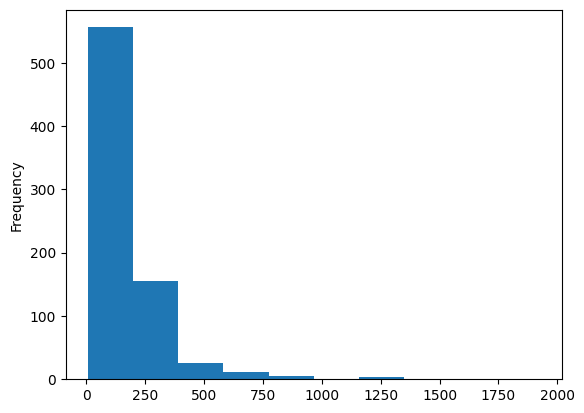

In [8]:
import matplotlib.pyplot as plt

dataset.len_words.plot(kind='hist');

(-0.5, 399.5, 199.5, -0.5)

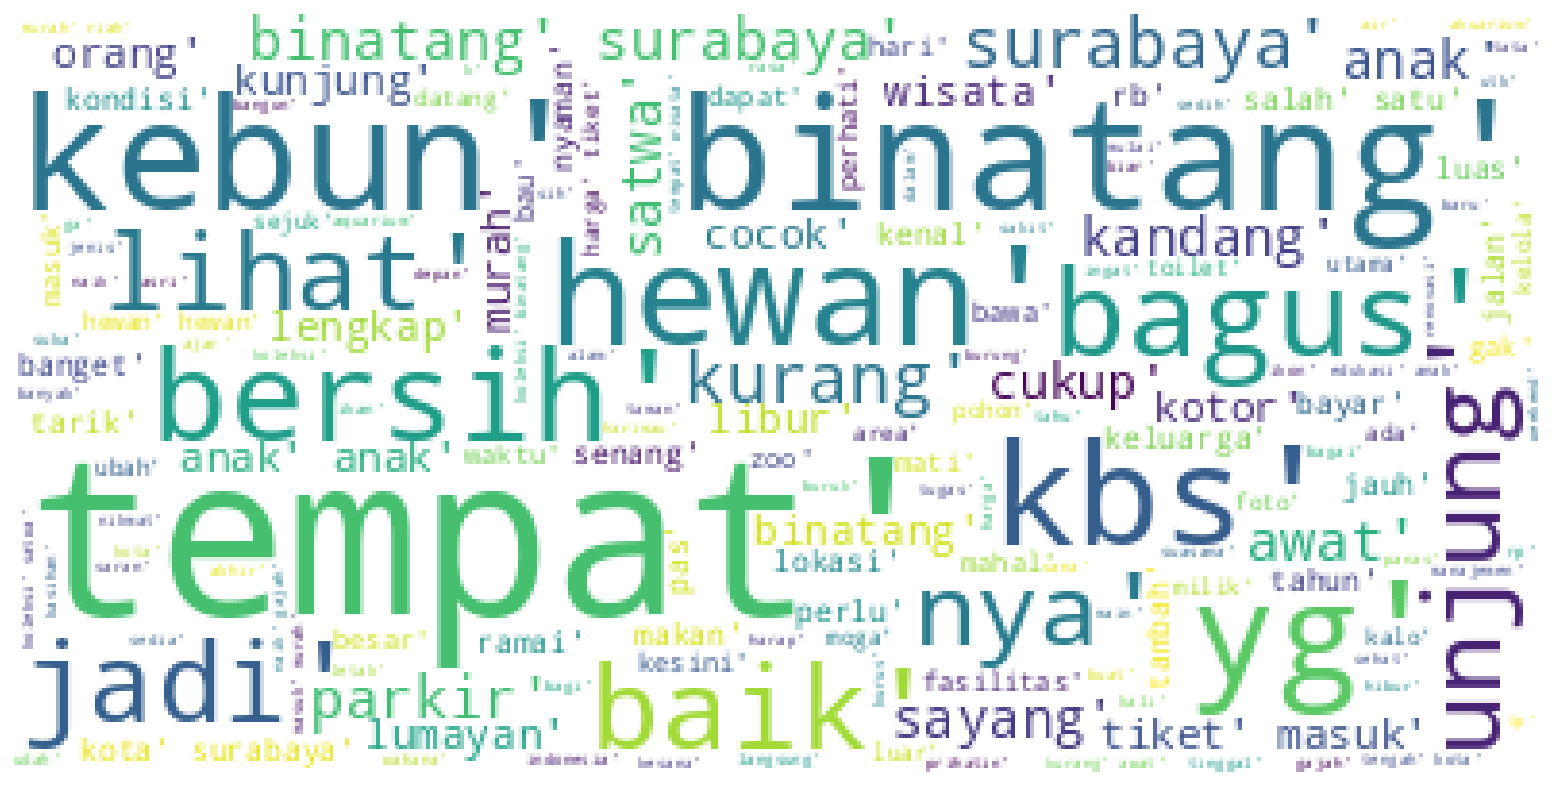

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 10
str_tweets = ' '.join(dataset.Stemmigs.values)

wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweets)

plt.imshow(wordcloud)
plt.axis("off")

In [25]:

#Vectorization
#Scikit-belajar ini CountVectorizer digunakan untuk mengkonversi koleksi dokumen teks ke vektor istilah / jumlah tanda
from sklearn.feature_extraction.text import TfidfVectorizer

# Untuk membuat Count Vectorizer, kita hanya perlu membuatnya.
# Ada parameter khusus yang dapat kita atur di sini saat membuat vectorizer, tetapi
# untuk contoh paling dasar, ini tidak diperlukan.
cv = TfidfVectorizer()


In [26]:
# Untuk benar-benar membuat vectorizer, kita hanya perlu memanggil fit pada teks
# data yang ingin kita perbaiki
cv.fit(dataset['Stemmigs'])
# Jika kita benar-benar ingin membuat vektor, kita dapat melakukannya dengan memasukkan teks
# ke dalam vectorizer untuk mendapatkan hitungan mundur
X = cv.transform(dataset['Stemmigs'])

y = dataset['Ahli']


In [27]:
dataset.shape

(760, 11)

In [28]:
print(X)

  (0, 2098)	0.17917471498034074
  (0, 1926)	0.25500862247702805
  (0, 1919)	0.0918763745796525
  (0, 1879)	0.16699894248105396
  (0, 1864)	0.2937894453466029
  (0, 1834)	0.2766286578472316
  (0, 1685)	0.20577976535062878
  (0, 1615)	0.22163818210385317
  (0, 1613)	0.2351163253492868
  (0, 1588)	0.2766286578472316
  (0, 1479)	0.2766286578472316
  (0, 1460)	0.2937894453466029
  (0, 1241)	0.13559740174144472
  (0, 1159)	0.12157313853653898
  (0, 1069)	0.13460150380168137
  (0, 970)	0.1620139274809695
  (0, 663)	0.2472920978485736
  (0, 631)	0.155088523262427
  (0, 525)	0.17387734646197706
  (0, 267)	0.190080996588962
  (0, 243)	0.10939736603725218
  (0, 137)	0.2766286578472316
  (1, 1863)	0.4421283298929827
  (1, 1281)	0.49457854722647104
  (1, 1225)	0.4421283298929827
  :	:
  (754, 1102)	0.44689591955834546
  (754, 655)	0.5870911973975141
  (754, 631)	0.43752632396751245
  (754, 129)	0.37298196984540694
  (755, 1457)	0.49660895683723877
  (755, 1429)	0.6465065652393341
  (755, 1069)	0.29

In [29]:
#Build Classifier
#sklearn adalah modul Python yang mengintegrasikan algoritme pembelajaran mesin klasik dalam dunia paket Python ilmiah yang erat
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [31]:
#Find the best value of C in support vector
#Mesin vektor pendukung (SVM) adalah sekumpulan metode pembelajaran yang diawasi yang digunakan untuk klasifikasi, regresi dan deteksi pencilan

for c in [0.01, 0.05, 0.25, 0.5, 1]:

    sv = SVC(C=c)
    sv.fit(X_train, y_train)
    print('Accuracy for C=%s: %s'
         % (c, accuracy_score(y_test, sv.predict(X_test))))

Accuracy for C=0.01: 0.9144736842105263
Accuracy for C=0.05: 0.9144736842105263
Accuracy for C=0.25: 0.9144736842105263
Accuracy for C=0.5: 0.9144736842105263
Accuracy for C=1: 0.9144736842105263


In [32]:
#Here I choose C=1 to build the final model for Support Vector.
final_model_sv = SVC(C=1)
final_model_sv.fit(X, y)
print('Final Model Accuracy: %s' %accuracy_score(y_test, final_model_sv.predict(X_test)))

Final Model Accuracy: 0.9539473684210527


In [33]:
for G in [0.01, 0.05, 0.25, 0.5, 1]:

    svm_gamma = SVC(gamma=G)
    svm_gamma.fit(X_train, y_train)
    print('Accuracy for gamma=%s: %s'
         % (G, accuracy_score(y_test, svm_gamma.predict(X_test))))

Accuracy for gamma=0.01: 0.9144736842105263
Accuracy for gamma=0.05: 0.9144736842105263
Accuracy for gamma=0.25: 0.9144736842105263
Accuracy for gamma=0.5: 0.9144736842105263
Accuracy for gamma=1: 0.9144736842105263
